#  Exercise - Computer Networks & Internet 

<img align="right" width=100 height=190 src="../images/TUM_Logo_blau_rgb_p.png"/>

<blockquote>
Munich Technical University / Chair of Geoinformatics <br> 
Murat Kendir*, Jicang Zhu, Prof. Thomas Kolbe <br> 
murat.kendir@tum.de
</blockquote>

<div align="right" style="font-size:0.5em;">v. WiSe 2025-2026</div>


In [1]:
import iplantuml

## Table of Contents

- [1. Examining the Network & Internet Infrastructure](#1-examining-the-network-&-internet-infrastructure)
    - [1.1. IP Addresses](#11-ip-addresses)
        - [1.1.1. Local IP Adress](#111-local-ip-adress)
        - [1.1.2. Global IP Adress](#112-global-ip-adress)
        - [1.1.3. How to reveal an IP address of a web source?](#113-how-to-reveal-an-ip-address-of-a-web-source)
- [2. Ping Command](#2-ping-command)
- [3. Background Information about the Current Internet Infrastructure (Optional Step)](#3-background-information-about-the-current-internet-infrastructure-optional-step)
- [4. Dig Command (available on Linux)](#4-dig-command-available-on-linux)
- [5. Traceroute Command (available on Linux)](5-traceroute-command-available-on-linux)



## 1. Examining the Network & Internet Infrastructure

Writing output for /home/murat/gitpot/dist-gis-exercises/docs/notebooks/1b2ea486-0fee-4602-a731-859f74cd6b71.uml to 1b2ea486-0fee-4602-a731-859f74cd6b71.svg


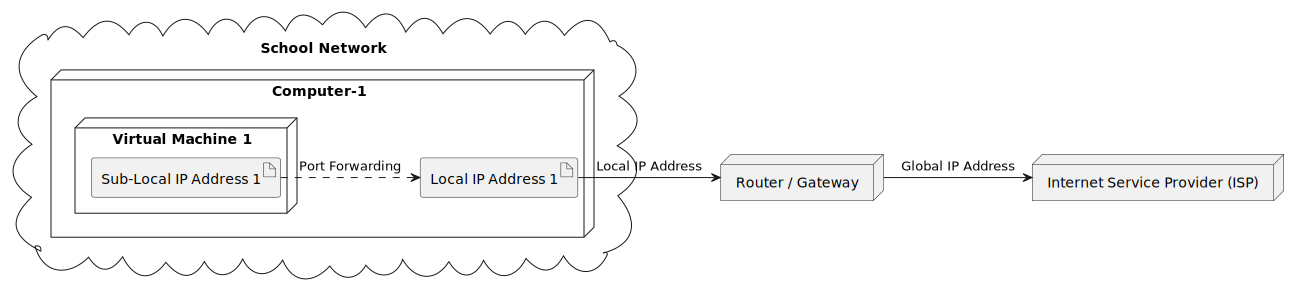

In [2]:
%%plantuml

@startuml
cloud "School Network" {
  node "Computer-1" as computer1 {
    node "Virtual Machine 1" {
      artifact "Sub-Local IP Address 1" as add11
    }
    artifact "Local IP Address 1" as add1
  }
}
node "Router / Gateway" as edge
node "Internet Service Provider (ISP)" as isp
add1 -> edge : Local IP Address
add11 .> add1 : Port Forwarding
edge -> isp : Global IP Address
@enduml

### 1.1. IP Addresses

#### 1.1.1. Local IP Adress

> The following steps explain how to reveal IP addresses using command-line based applications. This means you need to run a Command Line Interface (CLI) tool to execute them. Traditionally, CLI tools are called **“Command Prompt”** (or CMD) on Windows systems and **“Terminal”** on Unix-based systems.

> The name of the Command Prompt application is called **“EinGabeAufForderung”** on Windows computers with German as the system language.

> As an alternative for CMD, you can also use **Powershell** CLI tool in Windows computers.

In Windows Systems, it is possible to reveal out the IP addresses (both of v4 and v6) with the **ipconfig** command

```bash 
ipconfig /all
```

In Linux-based Systems, you can use multiple commands such as **ip**, **ifconfig** etc.

On Linux-based Systems, inet stands for Ipv4， inet6 stands for Ipv6.

```bash
ifconfig <INTERFACE-NAME>
```

```bash
ip address show
```

<figure style="width:%100;text-align: center;">
  <img src="../images/networks_internet/internet_protocol_suite.png" alt="The Level of the IP Adresses in Internet Protocol Suite" style="border:3px solid darkgray">
  <figcaption>The Level of the IP Adresses in Internet Protocol Suite</figcaption>
</figure> 


<figure style="width:%100;text-align: center;">
  <img src="../images/networks_internet/windows_cmd_ip4.png" alt="IPv4 and IPv6 addresses are exposed in the CMD tool" style="border:3px solid darkgray">
  <figcaption>IPv4 and IPv6 addresses are exposed in the CMD tool</figcaption>
</figure> 

#### 1.1.2. Global IP Address

There are many methods for revealing a computer network's global IP address. This IP address is usually automatically assigned to users by their ISP company. In some cases, users may prefer not to change their global IP addresses. In this case, they can request *static IP addresses* from their ISP.

Method 1: Using a web site

- [whatismyipaddress.com](https://whatismyipaddress.com/)
- [myip.com](https://www.myip.com/)
- [geolocation.com ( includes Location Information)](https://www.geolocation.com/)
- [duckduckgo.com/?&q=my+ip (via Search Engine)](https://duckduckgo.com/?&q=my+ip)

Method 2: Accessing to router interface

<figure style="width:%100;text-align: center;">
  <img src="../images/networks_internet/router_interface.png" alt="IPv4 and IPv6 addresses are exposed in the CMD tool" style="border:3px solid darkgray">
  <figcaption>The global IP address displayed in the “Status” section of the router's web interface</figcaption>
</figure> 

Method 3: Sending a request to an API

Windows Powershell Command:
```bash
(Invoke-WebRequest "http://ifconfig.me/ip").Content.Trim()
```

<figure style="width:%100;text-align: center;">
  <img src="../images/networks_internet/windows_powershell_external_ip.png" alt="IPv4 and IPv6 addresses are exposed in the CMD tool" style="border:3px solid darkgray">
  <figcaption>sending a request to ifconfig.me/ip API in Powershell</figcaption>
</figure> 

Linux Terminal Command:
```bash
curl ifconfig.me/ip
```

Via "NSLookUp":
```bash
nslookup myip.opendns.com. reseolver1.opendns.com
```

> TIP: If your Unix-based system cannot run the nslookup or ifconfig commands, you can search for and install the “net-tools” package in your system's default application repository. For example, on Ubuntu, it can be installed with the command ```sudo apt install net-tools```


#### 1.1.3. How to reveal an IP address of a web source?

**NSLookup** is a tool that can be used to query a server's DNS records. By default, this tool checks the A-type DNS record. However, there are other types of DNS records that can be queried using the same tool.

<figure style="width:%100;text-align: center;">
  <img src="../images/networks_internet/dns_records_sample.png" alt="IPv4 and IPv6 addresses are exposed in the CMD tool" style="border:3px solid darkgray">
  <figcaption>Different DNS record types listed in a DNS record management system.</figcaption>
</figure> 

If not restricted for security purposes, it is possible to resolve the IP address of web servers that provide certain services through domain(s). For this purpose, "nslookup" or some web applications (such as [mxtoolbox.com](https://mxtoolbox.com/supertool.aspx), [nslookup.io](https://www.nslookup.io)) can be used. 

```bash
nslookup geodienste.hamburg.de
```

- [ ] Copy the IP adress of the web server and by using the command above and paste into address bar of your browser.
    - What is the result?

> TIP : If you query an IP address directly using the nslookup command, it performs a **reverse lookup** by querying the in-addr.arpa (IPv4) or ip6.arpa (IPv6) zone. If a PTR record exists for that address, the command returns the domain name mapped to the IP.


### 1.1.4. Checking other DNS records of a domain

You can set the **type** option to expose out other DNS record types (A, AAA, CNAME, MX, NS, SOA):

```bash
nslookup -type=mx www.asg.ed.tum.de
```

- [ ] Visit the page [mxtoolbox.com](https://mxtoolbox.com) or [dnstools.ch](https://dnstools.ch) website to query DNS
records for the same domain.


## 2. Ping Command

The **“Ping”** command can be used to measure network performance between the request and the web resource. Keep in mind that the purpose of the web resource may cause differences in the results. In addition, the location of the request may also affect the result. (For example, querying a web resource located in China from Frankfurt does not mean that the same web resource will return the same result in China.)

- [ ] Type “ping -n amazon.DOMAIN_SUFFIX” for different countries that may be near or far from the current country. (For Exp. COM / DE / AU / NZ / CN ) 
    - ```ping -c 3 mit.edu``` (using a CDN which serves sources from Germany)
    - ```ping -c 3 stanford.edu``` (located in USA)
    - ```ping -c 3 www.tsinghua.edu.cn``` (located in China)
    - ```ping -c 3 sydney.edu.au``` (located in Australia)
    - ```ping -c 3 www.u-tokyo.ac.jp``` (located in Japan)

> TIP: "Count" option named as "Number" in the Windows version of the ping command. Use "-n" option instead of "-c" in Windows computers.

> TIP: In a unix-based system, you can use geoiplookup to resolve the location of the web resources.

## 3. Background Information about the Current Internet Infrastructure (Optional Step)

If you would like to learn more about the current internet infrastructure, you can visit the following websites or follow the instructions below.

- [ ] Global Internet Map (2022): [telegeography](https://global-internet-map-2022.telegeography.com/)
- [ ] 40 Maps that Explain Internet (Vox, 2014) : [vox.com/a/internet-maps](https://www.vox.com/a/internet-maps)
- [ ] Map of the Submarine Cables (2025) : [submarinecablemap.com](https://www.submarinecablemap.com/)
- [ ] Check the Cloud Service Reachability with "cloudping" online tool:
    - [ ] Visit and make ping test for any cloud service provider [cloudping.cloud](https://www.cloudping.cloud/)
    - [ ] Use a VPN browser extension to spoof your location as another country and try the ping test again.


## 4. Dig Command (available on Linux)

> If your Unix-based system does not have the **"dig"** program, you can install it by installing the **"dnsutils"** program.

- [ ] Type ```dig <WEB_DOMAIN>``` to resolve the DNS records of the given domain.
    - [ ] Copy the IP address shown as the target machine for the "A" type DNS record.
- [ ] Type ```dig +answer -x <COPIED_IP_ADDRESS>``` to perform a reverse lookup.
- [ ] If you have a web domain name, you can compare the previous results with the records accessible from your domain name management system. (For exp. go to Domains > DNS-Records in GoDaddy web site)
- [ ] Alternatively, you can visit [dnschecker.org](https://dnschecker.org/all-tools.php#dnsTool) and query for the same web sites using "DNS-Lookup" tool.

<figure style="width:%100;text-align: center;">
  <img src="../images/networks_internet/sequence_diagram_for_domain_resolving.png" alt="IPv4 and IPv6 addresses are exposed in the CMD tool" style="border:3px solid darkgray">
  <figcaption>Source: https://w3.cs.jmu.edu/kirkpams/OpenCSF/Books/csf/html/UDPSockets.html</figcaption>
</figure> 


## 5. Traceroute Command (available on Linux)

To expose the "hops" while you request any source from internet, you can use "traceroute" command. Traceroute is a standalone application that can be installed with command ```sudo apt install traceroute```. Another option is using dig with "+trace" argument (For exp. ```dig <WEB_DOMAIN> +trace```). Note that the location of the person making the request plays an important role in the route of the hops that appear as a result of the traceroute query.

- [ ] Find a web domain name whose server is located in Germany and try the traceroute command with it.
    - Sample : ```traceroute tum.de``` or ```dig tum.de +trace```
- [ ] Find a web domain name whose server is located in far country and try traceroute command on it.
    - [ ] Alternatively, you can spoof your location using VPN browser extension and run the traceoute command.
     
> TIP: If you cannot run the traceroute or dig command on your Linux machine, you can use the tracing tools available on the online network tool sites mentioned earlier.

<figure style="width:%100;text-align: center;">
  <img src="../images/networks_internet/how_traceroute_works.png" alt="IPv4 and IPv6 addresses are exposed in the CMD tool" style="border:3px solid darkgray">
  <figcaption>A simplified Computer Network Diagram showing how the traceroute command works</figcaption>
</figure> 